In [1]:
import numpy as np
from matplotlib import pyplot as plt

import baseline
import glob
import os
import pandas as pd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
path = '/Users/daphne/Dropbox (MIT)/pd-mlhc/CIS'

data = baseline.prepare_data(path)

subject_ids, measurement_ids, all_data, all_n_data, on_off_labels, dyskinesia_labels, tremor_labels = data

X_tre, y_tre = baseline.cleaned_data(all_data, tremor_labels)
X_med, y_med = baseline.cleaned_data(all_data, on_off_labels)
X_dys, y_dys = baseline.cleaned_data(all_data, dyskinesia_labels)

In [3]:
demo_file = glob.glob(os.path.join(path, 'clinical_data/CIS-PD_Demographics.csv'))[0]
demo = pd.read_csv(demo_file)

In [4]:
demo_trim = demo[demo['subject_id'].isin(subject_ids)]

In [5]:
'{:.1%} of the subjects are male ({} subjects)'.format(sum(list(demo_trim['Gender'] == 'Male'))/len(demo_trim), sum(list(demo_trim['Gender'] == 'Male')))

'68.8% of the subjects are male (11 subjects)'

In [6]:
num_meas = [len(j) for j in all_data]

In [7]:
len(all_data[0])

82

Text(0.5, 1.0, 'Number of Recordings per Patient')

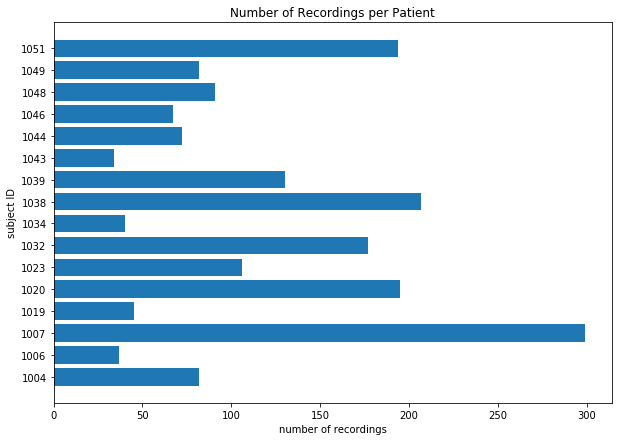

In [13]:
plt.figure(figsize=[10,7])
plt.barh(np.linspace(1,16,16),num_meas, tick_label=subject_ids)
plt.xlabel('number of recordings')
plt.ylabel('subject ID')
plt.title('Number of Recordings per Patient')

In [9]:
# now, duration of recordings per patient
durs = []
for i in range(len(subject_ids)) :
    single = all_data[i]
    dur_single = [a.shape[0]*.02/60 for a in single]
    durs.append(sum(dur_single))

Text(0.5, 1.0, 'Duration of Recordings per Patient')

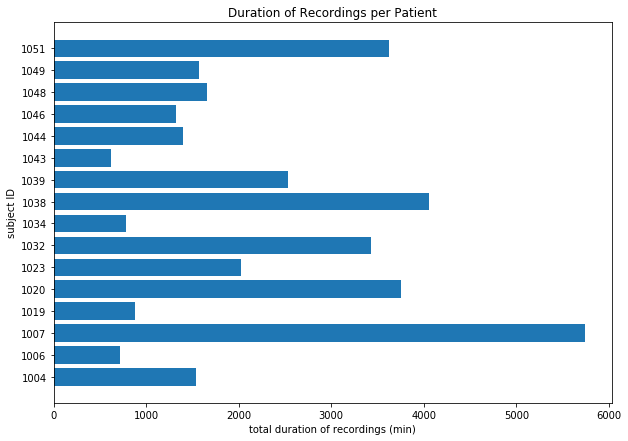

In [14]:
plt.figure(figsize=[10,7])
plt.barh(np.linspace(1,16,16), durs, tick_label=subject_ids)
plt.xlabel('total duration of recordings (min)')
plt.ylabel('subject ID')
plt.title('Duration of Recordings per Patient')

In [11]:
updrs_file = glob.glob(os.path.join(path, 'clinical_data/CIS-PD_UPDRS_Part1_2_4.csv'))[0]
updrs1 = pd.read_csv(updrs_file)
updrs_file = glob.glob(os.path.join(path, 'clinical_data/CIS-PD_UPDRS_Part3.csv'))[0]
updrs2 = pd.read_csv(updrs_file)

In [12]:
updrs2

,subject_id,Visit,ParticipantState,UPDRS_3a,UPDRS_3b,UPDRS_3c,UPDRS_3C1,UPDRS_3.1,UPDRS_3.2,UPDRS_3.3 Neck,...,UPDRS_3.16 Left Hand,UPDRS_3.17 Right Upper Extremity,UPDRS_3.17 Left Upper Extremity,UPDRS_3.17 Right Lower Extremity,UPDRS_3.17 Left Lower Extremity,UPDRS_3.17 Lip-Jaw,UPDRS_3.18,UPDRS_3.19A,UPDRS_3.19B,UPDRS_3.20
0,1000,Baseline,NaN,Yes,On,Yes,115.0,1.0,2.0,2.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes,No,2.0
1,1004,2 Weeks: Time 0,Off,NaN,NaN,NaN,NaN,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,No,NaN,2.0
2,1004,2 Weeks: Time 60,On,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes,No,2.0
3,1006,Baseline,NaN,Yes,On,Yes,150.0,1.0,3.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,1.0,No,NaN,2.0
4,1007,2 Weeks: Time 0,Off,NaN,NaN,NaN,NaN,0.0,0.0,2.0,...,1.0,1.0,0.0,2.0,0.0,0.0,2.0,No,NaN,2.0
5,1007,2 Weeks: Time 60,On,NaN,NaN,NaN,NaN,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,No,NaN,2.0
6,1016,2 Weeks: Time 0,Off,NaN,NaN,NaN,NaN,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,NaN,2.0
7,1016,2 Weeks: Time 60,On,NaN,NaN,NaN,NaN,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,No,NaN,2.0
8,1018,2 Weeks: Time 0,Off,NaN,NaN,NaN,NaN,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,No,NaN,2.0
9,1018,2 Weeks: Time 60,On,NaN,NaN,NaN,NaN,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,No,NaN,2.0
